## Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pickle

import sys
sys.path.append("../")

from parameters import D1_ND
from specrel import Parameters
_, L, m, c = Parameters()
from twobox import TwoBox

## Import data

In [111]:
## Ilic: I = 10e9, h=1e-4
# (0) y0 = -5% L
# (1) 1st damping eigenvector

runID = 2
I_string = "10G"
# pkl_fname = f'./Data/Second_Dynamics_run{runID}_I{I_string}.pkl'
pkl_fname = f'./Data/Ilic_Dynamics_run{runID}_I{I_string}.pkl'
Envelope = True # For eigenvector initial conditions 
Jacobian = False

## Import data - stability

In [ ]:
runID = 1
I_string = "10G"
# pkl_fname = f'./Data/Linearised/Second_Dynamics_run{runID}_I{I_string}.pkl'
pkl_fname = f'./Data/Linearised/Ilic_Dynamics_run{runID}_I{I_string}.pkl'

## Frame U

In [146]:
runID = 1
I_string = "10G"
# pkl_fname = f'./Data/FrameU/Second_Dynamics_run{runID}_I{I_string}.pkl'
pkl_fname = f'./Data/FrameU/Ilic_Dynamics_run{runID}_I{I_string}.pkl'
Jacobian = True

## Import data - grating response at v=0

In [ ]:
runID = 1
I_string = "10G"
pkl_fname = f'./Data/non-dispersive/Ilic_Dynamics_run{runID}_I{I_string}.pkl'
# pkl_fname = f'./Data/non-dispersive/Second_Dynamics_run{runID}_I{I_string}.pkl'

In [112]:
with open(pkl_fname, 'rb') as data_file:
    data = pickle.load(data_file)

timeL = data['timeL']
timeM = data['timeM']

YL = data['YL']
x = YL[0]
y = YL[1]
vx = YL[2]
vy = YL[3]
phiM = data['phiM']
phidotM = data['phidot']

eps = data['eps']
epsdot = data['epsdot']

## Build grating (for linear model)

In [113]:
grating_type = "Ilic"

if grating_type=="Ilic":
    ## Ilic
    wavelength      = 1.5 / D1_ND(5.3/100)
    grating_pitch   = 1.8 / wavelength
    grating_depth   = 0.5 / wavelength
    box1_width      = 0.15 * grating_pitch
    box2_width      = 0.35 * grating_pitch
    box_centre_dist = 0.60 * grating_pitch
    box1_eps        = 3.5**2 
    box2_eps        = 3.5**2
    gaussian_width  = 2 * 10
    substrate_depth = 0.5 / wavelength
    substrate_eps   = 1.45**2
if grating_type=="Optimised":
    ## Optimised - second
    grating_pitch   = 1.5384469388251338
    grating_depth   = 0.5580762361523982
    box1_width      = 0.10227122552871484
    box2_width      = 0.07605954942866577
    box_centre_dist = 0.2669020979549422
    box1_eps        = 9.614975107945112
    box2_eps        = 9.382304398409568
    gaussian_width  = 33.916288616522735
    substrate_depth = 0.17299998450776535
    substrate_eps   = 9.423032644325023

wavelength      = 1.
angle           = 0.
Nx              = 100
numG            = 25
Qabs            = np.inf

grating = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, numG, Qabs)

In [114]:
# data['Stopped']
# data['duration (min)']
# 100*vx[-1]/c
# timeL[-1]
x0_dyn = data['Initial']
h = data['step']
# I_dyn = data['Intensity']
I_dyn = 10e9

In [115]:
## Truncate
t_start = 0
t_end = timeL[-2]
x_trunc = x[(timeL>t_start) & (timeL<=t_end)]
y_trunc = y[(timeL>t_start) & (timeL<=t_end)]
vx_trunc = vx[(timeL>t_start) & (timeL<=t_end)]
vy_trunc = vy[(timeL>t_start) & (timeL<=t_end)]
phiM_trunc = phiM[(timeM>t_start) & (timeM<=t_end)]
phidotM_trunc = phidotM[(timeM>t_start) & (timeM<=t_end)]

timeMeps=timeM[0:-1]
timeM_trunc = timeM[(timeM>t_start) & (timeM<=t_end)]
timeMeps_trunc = timeMeps[(timeMeps>t_start) & (timeMeps<=t_end)]

eps_trunc = eps[(timeMeps>t_start) & (timeMeps<=t_end)]
epsdot_trunc = epsdot[(timeMeps>t_start) & (timeMeps<=t_end)]

timeL_trunc = timeL[(timeL>t_start) & (timeL<=t_end)]

## 

In [226]:
timeL_trunc

array([1.00000000e-04, 2.00000000e-04, 3.00000000e-04, ...,
       5.11248228e+01, 5.11249229e+01, 5.11250229e+01], shape=(511187,))

In [30]:
## Colors

colorX="black"   
colorvX="xkcd:pine green"

colorY="blue"
colorvY="dodgerblue"  #cornflowerblue

colorphi="red"  #"royalblue"
colorvphi="tomato"  #coral

colorRotate="darkgreen"
colorRotateRate="seagreen"

## Dynamics result

In [ ]:
fig, ( (ax1a, dummy, ax1b), (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=3, ncols=3, width_ratios=(1,0.05,1), figsize=(15,15))
dummy.axis('off')
dummy2.axis('off')
dummy3.axis('off')

############
ax1a.plot(timeL_trunc, x_trunc, color=colorX)
ax1a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax1b.plot(timeL_trunc, 100*vx_trunc/c, color=colorvX)
ax1b.set_xlim(timeL_trunc[0],timeL_trunc[-1])

ax1a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$x$ (m)")
ax1b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_x (\% c)$")

############
ax2a.plot(timeL_trunc, (y_trunc/L)*100, color=colorY)
ax2a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax2b.plot(timeL_trunc, vy_trunc, color=colorvY)
ax2b.set_xlim(timeL_trunc[0],timeL_trunc[-1])
# ax2b.plot(timeL, np.gradient(y,timeL), color="red", linestyle="dotted")
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
ax3a.plot(timeM_trunc, (180/np.pi)*phiM_trunc, color=colorphi)
ax3a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax3b.plot(timeM_trunc, (0.5/np.pi)*phidotM_trunc, color=colorvphi)
ax3b.set_xlim(timeL_trunc[0],timeL_trunc[-1])
# ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

# fig.suptitle(rf"{grating_type} grating from $5.3 \%c$, runID = {runID}")
fig.suptitle(rf"DYNAMICS: {grating_type} grating, I={I_dyn:.1E}, h={h}" "\n" rf"x0=[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]",
             y=0.95)

fig2, (ax4a, dummy4, ax4b) = plt.subplots(nrows=1, ncols=3, width_ratios=(1,0.1,1), figsize=(18,6))
dummy4.axis('off')

if not Jacobian:
    ax4a.plot(timeMeps_trunc, (180/np.pi)*eps_trunc, color=colorRotate)
    ax4a.set_xlim(timeMeps_trunc[0],timeMeps_trunc[-1])
    ax4b.plot(timeMeps_trunc, epsdot_trunc, color=colorRotateRate)
    ax4b.set_xlim(timeMeps_trunc[0],timeMeps_trunc[-1])
    # ax4b.plot(timeM[0:-1], np.gradient(eps,timeM[0:-1]), color="red", linestyle="dotted")
    ax4a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\\varepsilon$ (degrees)")
    ax4b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\\varepsilon}$")

    # fig2.suptitle(rf"{grating_type} grating from $5.3 \% c$, runID = {runID}")
    fig2.suptitle(rf"DYNAMICS: {grating_type} grating, I={I_dyn:.1E}, h={h}" "\n" rf"x0=[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]", 
                y=1.05)

## Fitting t = t(v/c)

In [117]:
from scipy.optimize import curve_fit
## Define function to map t = t(beta)
def func(x,a,b,c,d,e):
    """
    "x": vx/c
    """
    return a*x**4 + b*x**3 + c*x**2 + d*x + e
popt, pcov = curve_fit(func, vx_trunc/c, timeL_trunc)
a_fit = popt[0]
b_fit = popt[1]
c_fit = popt[2]
d_fit = popt[3]
e_fit = popt[4]
def v_to_t(v):
    return func(v,a_fit, b_fit, c_fit, d_fit, e_fit)

## Fitting v/c = v/c(t)

In [118]:
popt2,pcov2 = curve_fit(func, timeL_trunc, vx_trunc/c)
a_fit2 = popt2[0]
b_fit2 = popt2[1]
c_fit2 = popt2[2]
d_fit2 = popt2[3]
e_fit2 = popt2[4]
def t_to_v(t):
    return func(t,a_fit2, b_fit2, c_fit2, d_fit2, e_fit2)

## Dynamics results - with eigenvalues and vectors

In [119]:
## Calculate data for eigenvalues
final_speed = 2.7
num_points = 200
wavelength_range = np.linspace(1, 1/D1_ND(final_speed/100), num_points)
from numpy.linalg import norm as norm

####################
## Build arrays

## Q arrays
Q1 = np.zeros(num_points)
Q2 = np.zeros(num_points)

## Restoring arrays
kyy = np.zeros(num_points)
kyphi = np.zeros(num_points)
kphiy = np.zeros(num_points)
kphiphi = np.zeros(num_points)

## Damping arrays
muyy = np.zeros(num_points)
muyphi = np.zeros(num_points)
muphiy = np.zeros(num_points)
muphiphi = np.zeros(num_points)

## Eigenvalue arrays
real1 = np.zeros(num_points)
real2 = np.zeros(num_points)
real3 = np.zeros(num_points)
real4 = np.zeros(num_points)
imag1 = np.zeros(num_points)
imag2 = np.zeros(num_points)
imag3 = np.zeros(num_points)
imag4 = np.zeros(num_points)

vec1_mod = np.zeros( (4,num_points) )
vec2_mod = np.zeros( (4,num_points) )
vec3_mod = np.zeros( (4,num_points) )
vec4_mod = np.zeros( (4,num_points) )

## Calculate data
for i in range(num_points):
    wavelength = wavelength_range[i]
    Qs_array, rest_array, damp_array, real_array, imag_array, vec_array = grating.Linear_info_new(wavelength, I_dyn)
    ## Save to arrays
    Q1[i] = Qs_array[0];        Q2[i] = Qs_array[1]
    kyy[i] = rest_array[0];     kyphi[i] = rest_array[1];       kphiy[i] = rest_array[2];       kphiphi[i] = rest_array[3]
    muyy[i] = damp_array[0];    muyphi[i] = damp_array[1];      muphiy[i] = damp_array[2];      muphiphi[i] = damp_array[3]
    real1[i] = real_array[0];   real2[i] = real_array[1];       real3[i] = real_array[2];       real4[i] = real_array[3]
    imag1[i] = imag_array[0];   imag2[i] = imag_array[1];       imag3[i] = imag_array[2];       imag4[i] = imag_array[3]

    ## Extract (normalised) components of eigenvectors
    vec1, vec2, vec3, vec4 = vec_array
    vec1_mod[:,i] = np.abs(vec1)/norm(vec1)
    vec2_mod[:,i] = np.abs(vec2)/norm(vec2)
    vec3_mod[:,i] = np.abs(vec3)/norm(vec3)
    vec4_mod[:,i] = np.abs(vec4)/norm(vec4)

wavelength_minmax = [1, 1/D1_ND(final_speed/100)]

## Convert wavelength to velocity
v = np.zeros(num_points)
for i in range(num_points):
    D = 1/wavelength_range[i]
    v[i] = (1-D**2)/(1+D**2)


In [ ]:
## Convert eigenvalue/vector v array to time
time_eigs = v_to_t(v)

############################

fig, ( (ax1a, dummy, ax1b), (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=3, ncols=3, width_ratios=(1,0.05,1), figsize=(15,15))
dummy.axis('off')
dummy2.axis('off')
dummy3.axis('off')

############
## Plot eigs vs wavelength ##
marker_size = 2
colorReal=(0.7, 0, 0)
ax1a.hlines(0,time_eigs[0],time_eigs[-1], 'black' )
ax1a.plot(time_eigs,real1, 'o', markersize=marker_size, color=colorReal)
ax1a.plot(time_eigs,real2, 'o', markersize=marker_size, color=colorReal)
ax1a.plot(time_eigs,real3, 'o', markersize=marker_size, color=colorReal)
ax1a.plot(time_eigs,real4, 'o', markersize=marker_size, color=colorReal)

colorImag= 'blue'
ax1b.hlines(0,time_eigs[0],time_eigs[-1], 'black' )
ax1b.plot(time_eigs,imag1, 'o', markersize=marker_size, color=colorImag)
ax1b.plot(time_eigs,imag2, 'o', markersize=marker_size, color=colorImag)
ax1b.plot(time_eigs,imag3, 'o', markersize=marker_size, color=colorImag)
ax1b.plot(time_eigs,imag4, 'o', markersize=marker_size, color=colorImag)

# ax1b.yaxis.tick_right()
# ax1b.yaxis.set_label_position("right")
ax1a.set(xlim=(time_eigs[0],time_eigs[-1]), xlabel="Frame $\mathcal{L}$ time (s)", ylabel=rf"$\Re(\lambda)$")
ax1b.set(xlim=(time_eigs[0],time_eigs[-1]), xlabel="Frame $\mathcal{L}$ time (s)", ylabel=rf"$\Im(\lambda)$") 

############
## Plot y and vy
ax2a.plot(timeL_trunc, (y_trunc/L)*100, color=colorY)
ax2a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax2b.plot(timeL_trunc, vy_trunc, color=colorvY)
ax2b.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
## Plot phi and vphi
ax3a.plot(timeM_trunc, (180/np.pi)*phiM_trunc, color=colorphi)
ax3a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax3b.plot(timeM_trunc, (0.5/np.pi)*phidotM_trunc, color=colorvphi)
ax3b.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

# fig.suptitle(rf"{grating_type} grating from $5.3 \%c$, runID = {runID}")
fig.suptitle(rf"DYNAMICS: {grating_type} grating, I={I_dyn:.1E}, h={h}" "\n" rf"x0=[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]",
             y=0.95)

fig2, (ax4a, dummy4, ax4b) = plt.subplots(nrows=1, ncols=3, width_ratios=(1,0.1,1), figsize=(18,6))
dummy4.axis('off')

if not Jacobian:
    ax4a.plot(timeMeps_trunc, (180/np.pi)*eps_trunc, color=colorRotate)
    ax4a.set_xlim(timeMeps_trunc[0],timeMeps_trunc[-1])
    ax4b.plot(timeMeps_trunc, epsdot_trunc, color=colorRotateRate)
    ax4b.set_xlim(timeMeps_trunc[0],timeMeps_trunc[-1])
    # ax4b.plot(timeM[0:-1], np.gradient(eps,timeM[0:-1]), color="red", linestyle="dotted")
    ax4a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\\varepsilon$ (degrees)")
    ax4b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\\varepsilon}$")

    # fig2.suptitle(rf"{grating_type} grating from $5.3 \% c$, runID = {runID}")
    fig2.suptitle(rf"DYNAMICS: {grating_type} grating, I={I_dyn:.1E}, h={h}" "\n" rf"x0=[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]", 
                y=1.05)



In [82]:
### PLOTTING ### 
from matplotlib.ticker import Locator
class MinorSymLogLocator(Locator):
    """
    Dynamically find minor tick positions based on the positions of
    major ticks for a symlog scaling.
    """
    def __init__(self, linthresh):
        """
        Ticks will be placed between the major ticks.
        The placement is linear for x between -linthresh and linthresh,
        otherwise its logarithmically
        """
        self.linthresh = linthresh

    def __call__(self):
        'Return the locations of the ticks'
        majorlocs = self.axis.get_majorticklocs()

        # iterate through minor locs
        minorlocs = []

        # handle the lowest part
        for i in range(1, len(majorlocs)):
            majorstep = majorlocs[i] - majorlocs[i-1]
            if abs(majorlocs[i-1] + majorstep/2) < self.linthresh:
                ndivs = 10
            else:
                ndivs = 9
            minorstep = majorstep / ndivs
            locs = np.arange(majorlocs[i-1], majorlocs[i], minorstep)[1:]
            minorlocs.extend(locs)

        return self.raise_if_exceeds(np.array(minorlocs))

    def tick_values(self, vmin, vmax):
        raise NotImplementedError('Cannot get tick locations for a '
                                  '%s type.' % type(self))
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath, physics}')

Text(0.5, 0.98, 'DYNAMICS: Ilic grating, $I_0$=1.0E+10, $h=$0.0001\n$\\vb{x}_0=$[0.0, 5.64E-08, 1.91E-08, 0.0, -2.00E+00, -6.68E-02]')

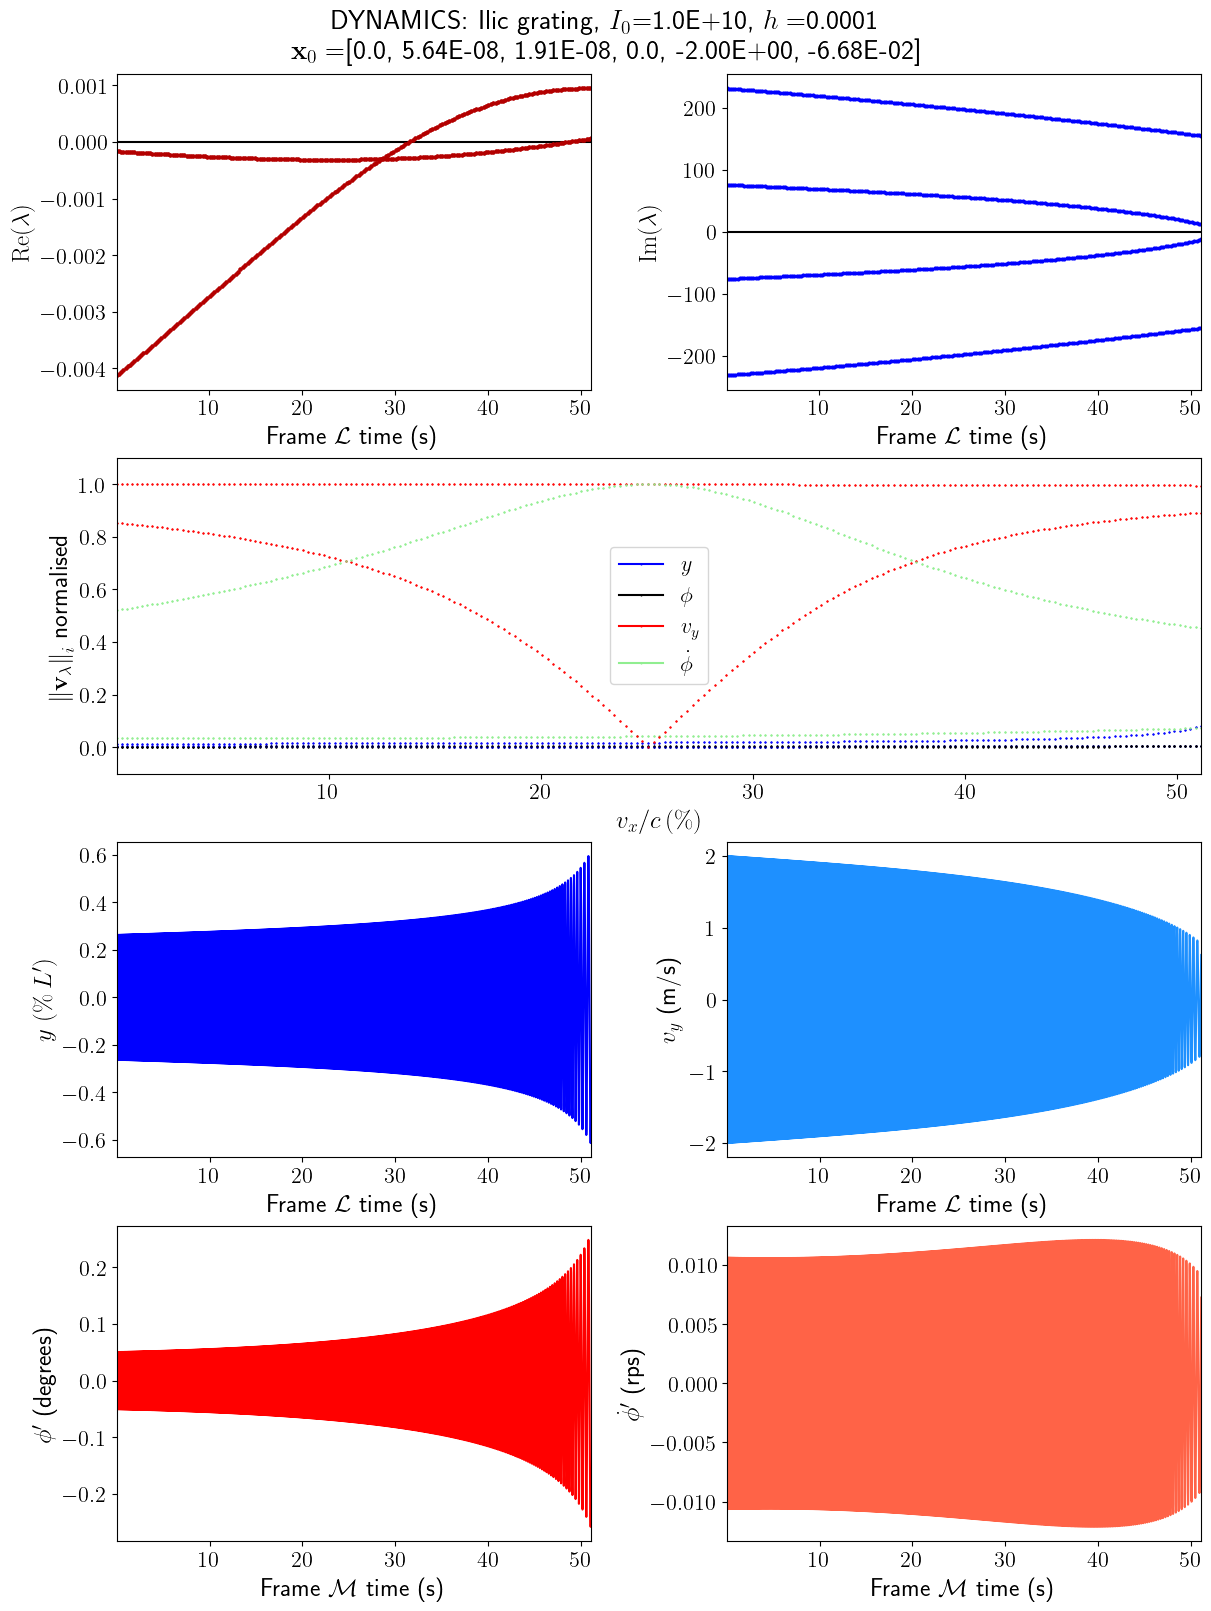

In [120]:
## Convert eigenvalue/vector v array to time
time_eigs = v_to_t(v)

colorY2="blue"
colorvY2="red"  #cornflowerblue

colorphi2="black"  #"royalblue"
colorvphi2="lightgreen"  #coral

############################
fig, axd = plt.subplot_mosaic(
    [
        ["ax1a","ax1b"],
        ["ax2", "ax2"],
        ["ax3a","ax3b"],
        ["ax4a","ax4b"]
    ],
    empty_sentinel="BLANK",
    # width_ratios=[1, 0.0, 1],
    constrained_layout=True
)
scale = 0.8
fig.set_size_inches(scale*15, scale*20)

############
## Plot eigs vs wavelength ##
marker_size = 2
colorReal=(0.7, 0, 0)
axd['ax1a'].hlines(0,time_eigs[0],time_eigs[-1], 'black' )
axd['ax1a'].plot(time_eigs,real1, 'o', markersize=marker_size, color=colorReal)
axd['ax1a'].plot(time_eigs,real2, 'o', markersize=marker_size, color=colorReal)
axd['ax1a'].plot(time_eigs,real3, 'o', markersize=marker_size, color=colorReal)
axd['ax1a'].plot(time_eigs,real4, 'o', markersize=marker_size, color=colorReal)

colorImag= 'blue'
axd['ax1b'].hlines(0,time_eigs[0],time_eigs[-1], 'black' )
axd['ax1b'].plot(time_eigs,imag1, 'o', markersize=marker_size, color=colorImag)
axd['ax1b'].plot(time_eigs,imag2, 'o', markersize=marker_size, color=colorImag)
axd['ax1b'].plot(time_eigs,imag3, 'o', markersize=marker_size, color=colorImag)
axd['ax1b'].plot(time_eigs,imag4, 'o', markersize=marker_size, color=colorImag)

# ax1b.yaxis.tick_right()
# ax1b.yaxis.set_label_position("right")
axd['ax1a'].set(xlim=(time_eigs[0],time_eigs[-1]), xlabel="Frame $\mathcal{L}$ time (s)", ylabel=rf"$\Re(\lambda)$")
axd['ax1b'].set(xlim=(time_eigs[0],time_eigs[-1]), xlabel="Frame $\mathcal{L}$ time (s)", ylabel=rf"$\Im(\lambda)$") 

###########
## Plot eigenvectors
marker = 'o'
## Plots
line1, = axd['ax2'].plot(time_eigs,vec1_mod[0], marker, markersize=0.5, label=r"$y$", color=colorY2)
line2, = axd['ax2'].plot(time_eigs,vec1_mod[1], marker, markersize=0.5, label=r"$\phi$", color=colorphi2)
line3, = axd['ax2'].plot(time_eigs,vec1_mod[2], marker, markersize=0.5, label=r"$v_y$", color=colorvY2)
line4, = axd['ax2'].plot(time_eigs,vec1_mod[3], marker, markersize=0.5, label=r"$\dot{\phi}$", color=colorvphi2)

axd['ax2'].plot(time_eigs,vec2_mod[0], marker, markersize=0.5, color=colorY2)
axd['ax2'].plot(time_eigs,vec2_mod[1], marker, markersize=0.5, color=colorphi2)
axd['ax2'].plot(time_eigs,vec2_mod[2], marker, markersize=0.5, color=colorvY2)
axd['ax2'].plot(time_eigs,vec2_mod[3], marker, markersize=0.5, color=colorvphi2)
axd['ax2']
axd['ax2'].plot(time_eigs,vec3_mod[0], marker, markersize=0.5, color=colorY2)
axd['ax2'].plot(time_eigs,vec3_mod[1], marker, markersize=0.5, color=colorphi2)
axd['ax2'].plot(time_eigs,vec3_mod[2], marker, markersize=0.5, color=colorvY2)
axd['ax2'].plot(time_eigs,vec3_mod[3], marker, markersize=0.5, color=colorvphi2)
axd['ax2']
axd['ax2'].plot(time_eigs,vec4_mod[0], marker, markersize=0.5, color=colorY2)
axd['ax2'].plot(time_eigs,vec4_mod[1], marker, markersize=0.5, color=colorphi2)
axd['ax2'].plot(time_eigs,vec4_mod[2], marker, markersize=0.5, color=colorvY2)
axd['ax2'].plot(time_eigs,vec4_mod[3], marker, markersize=0.5, color=colorvphi2)

axd['ax2'].set(xlim=(time_eigs[0],time_eigs[-1]),ylim=(-0.1,1.1))
# ax1.set_xticks([0,1,2,2.7])
from matplotlib.legend_handler import HandlerLine2D
legend = axd['ax2'].legend(handler_map={
    line1: HandlerLine2D(numpoints=1),
    line2: HandlerLine2D(numpoints=1),
    line3: HandlerLine2D(numpoints=1) })
for legend_handle in legend.legend_handles:
    legend_handle.set_linestyle('-')

## Labels
axd['ax2'].set(xlabel=r"$v_x/c\, (\%)$", ylabel=r"$\norm{\vb{v}_{\lambda}}_i $ normalised")


############
## Plot y and vy
axd['ax3a'].plot(timeL_trunc, (y_trunc/L)*100, color=colorY)
axd['ax3a'].set_xlim(timeL_trunc[0],timeL_trunc[-1])
axd['ax3b'].plot(timeL_trunc, vy_trunc, color=colorvY)
axd['ax3b'].set_xlim(timeL_trunc[0],timeL_trunc[-1])
axd['ax3a'].set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
axd['ax3b'].set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
## Plot phi and vphi
axd['ax4a'].plot(timeM_trunc, (180/np.pi)*phiM_trunc, color=colorphi)
axd['ax4a'].set_xlim(timeL_trunc[0],timeL_trunc[-1])
axd['ax4b'].plot(timeM_trunc, (0.5/np.pi)*phidotM_trunc, color=colorvphi)
axd['ax4b'].set_xlim(timeL_trunc[0],timeL_trunc[-1])
axd['ax4a'].set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
axd['ax4b'].set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

fig.suptitle(rf"DYNAMICS: {grating_type} grating, $I_0$={I_dyn:.1E}, $h=${h}" "\n" r"$\vb{x}_0=$"rf"[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]")

# fig2, (ax4a, dummy4, ax4b) = plt.subplots(nrows=1, ncols=3, width_ratios=(1,0.1,1), figsize=(18,6))
# dummy4.axis('off')

# if not Jacobian:
#     ax5a.plot(timeMeps_trunc, (180/np.pi)*eps_trunc, color=colorRotate)
#     ax5a.set_xlim(timeMeps_trunc[0],timeMeps_trunc[-1])
#     ax5b.plot(timeMeps_trunc, epsdot_trunc, color=colorRotateRate)
#     ax5b.set_xlim(timeMeps_trunc[0],timeMeps_trunc[-1])
#     # 5x4b.plot(timeM[0:-1], np.gradient(eps,timeM[0:-1]), color="red", linestyle="dotted")
#     ax5a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\\varepsilon$ (degrees)")
#     ax5b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\\varepsilon}$")

#     # fig2.suptitle(rf"{grating_type} grating from $5.3 \% c$, runID = {runID}")
#     fig2.suptitle(rf"DYNAMICS: {grating_type} grating, I={I_dyn:.1E}, h={h}" "\n" rf"x0=[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]", 
#                 y=1.05)



## Restoring and damping terms over time

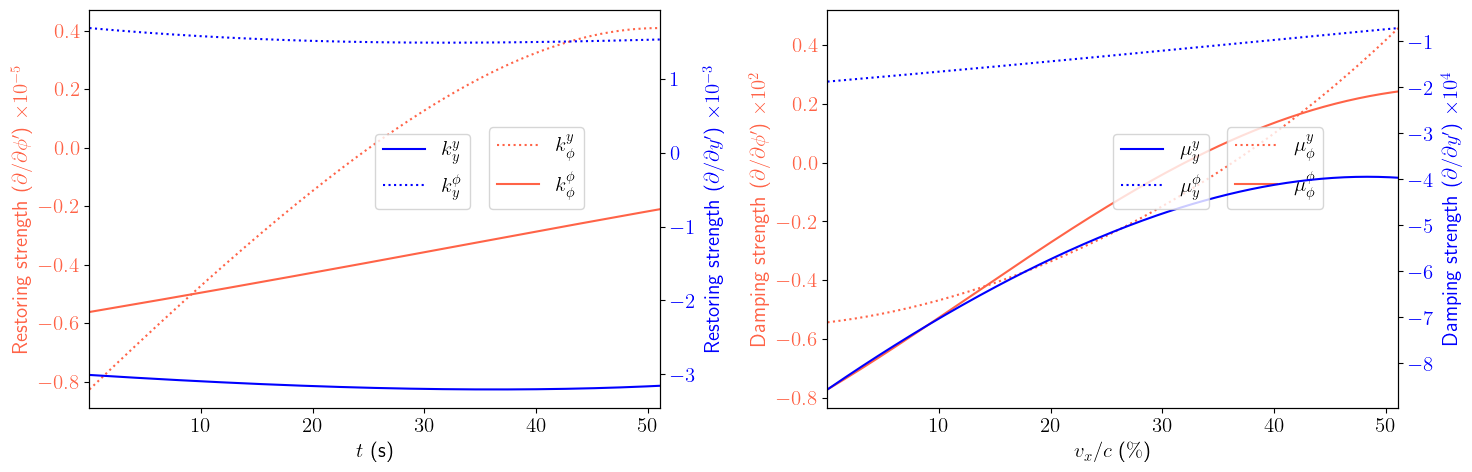

In [121]:
## Combined
LabelSize = 15

################
# Restoring terms

fig,(ax, ax2) =plt.subplots(1,2,figsize=(15,5))

ax.plot(time_eigs,kyphi*1e-5,  label="$k^y_\phi$",color=colorvphi,linestyle="dotted")
ax.plot(time_eigs,kphiphi*1e-5,label="$k^\phi_\phi$",color=colorvphi)

ax.set_xlabel("$t$ (s)",fontsize=LabelSize)
ax.set_ylabel("Restoring strength ($\partial/\partial \phi'$) $\\times 10^{-5}$",fontsize=LabelSize,color=colorvphi)
ax.tick_params(labelsize=15)
ax.tick_params(axis='y',labelcolor=colorvphi)


# ax.hlines(0,0,5,"k","dashed",alpha=0.2)
t=ax.get_ylim()
# ax.axhspan(0,t[1],color='black',alpha=0.2)

ax1=ax.twinx()

ax1.plot(time_eigs,kphiy*1e-3,  label="$k^\phi_y$",color=colorY,linestyle="dotted")
ax1.plot(time_eigs,kyy*1e-3,    label="$k^y_y$",color=colorY)

ax1.set_ylabel("Restoring strength ($\partial/\partial y'$)  $\\times 10^{-3}$",fontsize=LabelSize,color=colorY)
ax1.tick_params(labelsize=15)
ax1.tick_params(axis='y',labelcolor=colorY)


ax.set_ylim(t)
ax.set_xlim(time_eigs[0],time_eigs[-1])

# ax.set_xticks([0,1,1.45,2,3,4,5])

handles, labels = ax.get_legend_handles_labels()
handles1, labels1 = ax1.get_legend_handles_labels()
order = [0,1]
order1=[1,0]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=(0.5+0.2,0.5),fontsize=LabelSize)
ax1.legend([handles1[idx] for idx in order1],[labels1[idx] for idx in order1],loc=(0.5,0.5),fontsize=LabelSize)

########################
ax2.plot(time_eigs,muyphi*1e2,  label="$\mu^y_\phi$",color=colorvphi,linestyle="dotted")
ax2.plot(time_eigs,muphiphi*1e2,label="$\mu^\phi_\phi$",color=colorvphi)
ax2
ax2.set_xlabel("$v_x/c$ ($\%$)",fontsize=LabelSize)
ax2.set_ylabel("Damping strength ($\partial/\partial \phi'$) $\\times 10^{2}$",fontsize=LabelSize,color=colorvphi)
ax2.tick_params(labelsize=15)
ax2.tick_params(axis='y',labelcolor=colorvphi)

t=ax2.get_ylim()
ax2b=ax2.twinx()

ax2b.plot(time_eigs,muphiy*1e4,  label="$\mu^\phi_y$",color=colorY,linestyle="dotted")
ax2b.plot(time_eigs,muyy*1e4,    label="$\mu^y_y$",color=colorY)

ax2b.set_ylabel("Damping strength ($\partial/\partial y'$) $\\times 10^{4}$",fontsize=LabelSize,color=colorY)
ax2b.tick_params(labelsize=15)
ax2b.tick_params(axis='y',labelcolor=colorY)

# # Does not correspond to 1.28%
# ax.vlines(1.4507253626813408,t[0],0,color='k',linestyle='dashed',alpha=0.2)
# ax.hlines(0,0,1.4507253626813408,color='k',linestyle='dashed',alpha=0.2)

ax2.set_ylim(t)
ax2.set_xlim(time_eigs[0],time_eigs[-1])

# ax.set_xticks([0,1,1.45,2,3,4,5])

handles, labels = ax2.get_legend_handles_labels()
handles1, labels1 = ax2b.get_legend_handles_labels()
order = [0,1]
order1=[1,0]
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=(0.5+0.2,0.5),fontsize=LabelSize)
ax2b.legend([handles1[idx] for idx in order1],[labels1[idx] for idx in order1],loc=(0.5,0.5),fontsize=LabelSize)



fig.tight_layout()
# plt.savefig("Saved/Restoring300.jpeg",format="jpeg",dpi=300,bbox_inches='tight')
# plt.close()



## Linear model

In [218]:
I = 10e9; m=1/1000; c = 299792458
x0 = [data['Initial'][1], data['Initial'][2], data['Initial'][4], data['Initial'][5]]
grating.wavelength = 1 #1/D1_ND(4.8/100)
real, imag, P = grating.Eigs(I, m, c, grad_method="grad",check_det=False,return_vec=True)
P_inverse = np.linalg.inv(P)
# print("Re(eig):", real*1e4)
# print("Im(eig):", imag)
vec1 = P[:,0]; vec2 = P[:,1];       vec3 = P[:,2]; vec4 = P[:,3]

## Linear model
def X_linear(t,x0):
    """
    ## Inputs
    t: time (~in M~)
    x0: 1x4 array (~in M~)
    ## Outputs
    Time evolved solution (~in M~)
    """
    sum = 0
    for i in range(4):
        sum = sum + np.matmul(P_inverse, x0)[i] * np.exp(t*(real + 1j*imag))[i] * P[:,i]
    return np.real(sum)
def X_linear_arrays(t_array,x0):
    y = np.zeros(len(t_array))
    phi = np.zeros(len(t_array))
    vy = np.zeros(len(t_array))
    vphi = np.zeros(len(t_array))
    for i in range(len(t_array)):
        X = X_linear(t_array[i],x0)
        y[i] = X[0]
        phi[i] = X[1]
        vy[i] = X[2]
        vphi[i] = X[3]
    return y, phi, vy, vphi
## Envelope in case x0 = Re(vec)
def X_linear_conj(t, real, imag, vec):
    # return 2 * np.exp(real*t)*( np.cos(imag*t)*np.real(vec) - np.sin(imag*t)*np.imag(vec) )
    return 2 * np.exp(real*t)*( np.abs(np.real(vec)) + np.abs(np.imag(vec)) )
def X_linear_conj_arrays(t_array,real, imag, vec):
    y_lin_conj = np.zeros(len(t_array))
    phi_lin_conj = np.zeros(len(t_array))
    vy_lin_conj = np.zeros(len(t_array))
    vphi_lin_conj = np.zeros(len(t_array))
    for i in range(len(t_array)):
        X = X_linear_conj(t_array[i],real, imag, vec)
        y_lin_conj[i] = X[0]
        phi_lin_conj[i] = X[1]
        vy_lin_conj[i] = X[2]
        vphi_lin_conj[i] = X[3]
    return y_lin_conj, phi_lin_conj, vy_lin_conj, vphi_lin_conj

# t_array = np.linspace(0,100,10000) 
t_array = np.linspace(timeL_trunc[0],timeL_trunc[-1],10000)

# x0 = np.array( [-(5/100)*L, 0, 1, 0] )
# x0 = np.real(vec1 + vec2)
# x0 = np.real(vec3 + vec4)

## Linear model
y_lin, phi_lin, vy_lin, vphi_lin = X_linear_arrays(t_array,x0)
## Enevelope in case
y_lin_conj, phi_lin_conj, vy_lin_conj, vphi_lin_conj = X_linear_conj_arrays(t_array, real[0], imag[0], vec1)
# y_lin_conj, phi_lin_conj, vy_lin_conj, vphi_lin_conj = X_linear_conj_arrays(t_array, real[2], imag[2], vec3)
Envelope = True

In [120]:
print("Re(eig)",real[2])
print("vec: ", 2*np.real(vec3))

Re(eig) -0.0003064680675418166
vec:  [ 3.59070417e-07  2.97889776e-08 -1.99908332e+00 -3.63719137e-02]


In [ ]:
## Frame L time
fig, ( (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=2, ncols=3, width_ratios=(1,0.05,1), figsize=(15,10))
dummy2.axis('off')
dummy3.axis('off')

############
ax2a.plot(t_array, (y_lin/L)*100, color=colorY)
ax2b.plot(t_array, vy_lin, color=colorvY)
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
ax3a.plot(t_array, (180/np.pi)*phi_lin, color=colorphi)
ax3b.plot(t_array, (0.5/np.pi)*vphi_lin, color=colorvphi)
# ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

if Envelope:
    ax2a.plot(t_array, (y_lin_conj/L)*100, color='black') 
    ax2a.plot(t_array, -(y_lin_conj/L)*100, color='black') 
    ax2b.plot(t_array, vy_lin_conj, color='black') 
    ax2b.plot(t_array, -vy_lin_conj, color='black') 
    ax3a.plot(t_array, (180/np.pi)*phi_lin_conj, color='black')
    ax3a.plot(t_array, -(180/np.pi)*phi_lin_conj, color='black')
    ax3b.plot(t_array, (0.5/np.pi)*vphi_lin_conj, color='black')
    ax3b.plot(t_array, -(0.5/np.pi)*vphi_lin_conj, color='black')

## x bounds
ax2a.set_xlim(0,t_array[-1])
ax2b.set_xlim(0,t_array[-1])
ax3a.set_xlim(0,t_array[-1])
ax3b.set_xlim(0,t_array[-1])

if Envelope:
    fig.suptitle(rf"LINEAR: {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0[0]:.2E}, {x0[1]:.2E}, {x0[2]:.2E}, {x0[3]:.2E}]")
else:
    fig.suptitle(rf"LINEAR: {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0[0]:.4f}, {x0[1]:.4f}, {x0[2]:.4f}, {x0[3]:.4f}]")


In [ ]:
## Frame L time
fig, ( (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=2, ncols=3, width_ratios=(1,0.05,1), figsize=(15,10))
dummy2.axis('off')
dummy3.axis('off')

############
ax2a.plot(t_array, (y_lin/L)*100, color=colorY)
ax2b.plot(t_array, vy_lin, color=colorvY)
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
ax3a.plot(t_array, (180/np.pi)*phi_lin, color=colorphi)
ax3b.plot(t_array, (0.5/np.pi)*vphi_lin, color=colorvphi)
# ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

if Envelope:
    ax2a.plot(t_array, (y_lin_conj/L)*100, color='black') 
    ax2a.plot(t_array, -(y_lin_conj/L)*100, color='black') 
    ax2b.plot(t_array, vy_lin_conj, color='black') 
    ax2b.plot(t_array, -vy_lin_conj, color='black') 
    ax3a.plot(t_array, (180/np.pi)*phi_lin_conj, color='black')
    ax3a.plot(t_array, -(180/np.pi)*phi_lin_conj, color='black')
    ax3b.plot(t_array, (0.5/np.pi)*vphi_lin_conj, color='black')
    ax3b.plot(t_array, -(0.5/np.pi)*vphi_lin_conj, color='black')

## x bounds
ax2a.set_xlim(0,t_array[-1])
ax2b.set_xlim(0,t_array[-1])
ax3a.set_xlim(0,t_array[-1])
ax3b.set_xlim(0,t_array[-1])

if Envelope:
    fig.suptitle(rf"LINEAR: {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0[0]:.2E}, {x0[1]:.2E}, {x0[2]:.2E}, {x0[3]:.2E}]")
else:
    fig.suptitle(rf"LINEAR: {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0[0]:.4f}, {x0[1]:.4f}, {x0[2]:.4f}, {x0[3]:.4f}]")


In [ ]:
## Normalised time
t_factor = np.sqrt((m*c)/I)
fig, ( (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=2, ncols=3, width_ratios=(1,0.05,1), figsize=(15,10))
dummy2.axis('off')
dummy3.axis('off')

############

############
ax2a.plot(t_array/t_factor, (y_lin/L)*100, color=colorY)
ax2a.set_xlim(0,t_array[-1]/t_factor)
ax2b.plot(t_array/t_factor, vy_lin, color=colorvY)
ax2b.set_xlim(0,t_array[-1]/t_factor)
# ax2b.plot(timeL, np.gradient(y,timeL), color="red", linestyle="dotted")
ax2a.set(xlabel="Normalised frame $\mathcal{L}$ time $(\sqrt{mc/I})$", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time $(\sqrt{mc/I})$", ylabel="$v_y$ (m/s)")

############
ax3a.plot(t_array/t_factor, (180/np.pi)*phi_lin, color=colorphi)
ax3a.set_xlim(0,t_array[-1]/t_factor)
ax3b.plot(t_array/t_factor, (0.5/np.pi)*vphi_lin, color=colorvphi)
ax3b.set_xlim(0,t_array[-1]/t_factor)
# ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time $(\sqrt{mc/I})$", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time $(\sqrt{mc/I})$", ylabel="$\dot{\phi}'$ (rps)")

fig.suptitle(rf"LINEAR: {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0[0]:.4f}, {x0[1]:.4f}, {x0[2]:.4f}, {x0[3]:.4f}]")


## Overlaid

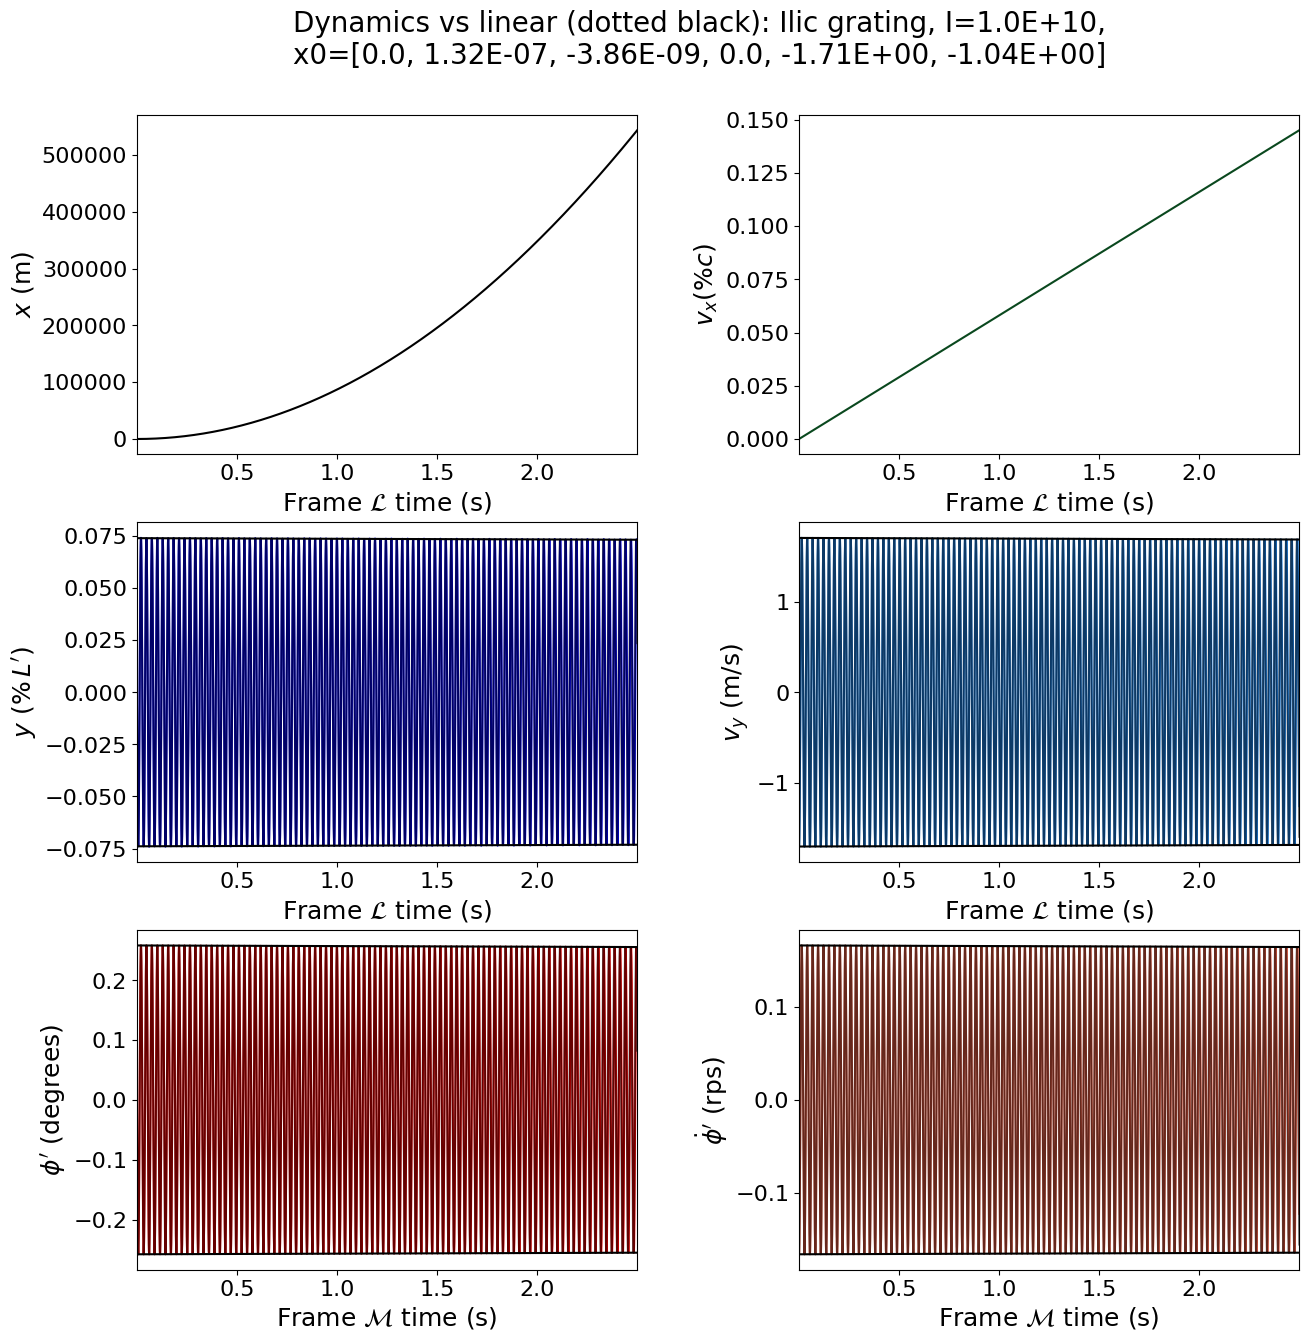

In [219]:
fig, ( (ax1a, dummy, ax1b), (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=3, ncols=3, width_ratios=(1,0.05,1), figsize=(15,15))
dummy.axis('off')
dummy2.axis('off')
dummy3.axis('off')

fig.suptitle(rf"Dynamics vs linear (dotted black): {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]",
             y=0.95)

############
ax1a.plot(timeL_trunc, x_trunc, color=colorX)
ax1a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax1b.plot(timeL_trunc, 100*vx_trunc/c, color=colorvX)
ax1b.set_xlim(timeL_trunc[0],timeL_trunc[-1])

ax1a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$x$ (m)")
ax1b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_x (\% c)$")

############
ax2a.plot(timeL_trunc, (y_trunc/L)*100, color=colorY)
ax2a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax2b.plot(timeL_trunc, vy_trunc, color=colorvY)
ax2b.set_xlim(timeL_trunc[0],timeL_trunc[-1])
# ax2b.plot(timeL, np.gradient(y,timeL), color="red", linestyle="dotted")
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

## Linear
ax2a.plot(t_array, (y_lin/L)*100, color='black', alpha=0.6)
ax2b.plot(t_array, vy_lin, color='black', alpha=0.6)

############
ax3a.plot(timeM_trunc, (180/np.pi)*phiM_trunc, color=colorphi)
ax3a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax3b.plot(timeM_trunc, (0.5/np.pi)*phidotM_trunc, color=colorvphi)
ax3b.set_xlim(timeL_trunc[0],timeL_trunc[-1])
# ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

## Linear
ax3a.plot(t_array, (180/np.pi)*phi_lin, color='black', alpha=0.6)
ax3a.set_xlim(t_array[0],t_array[-1])
ax3b.plot(t_array, (0.5/np.pi)*vphi_lin, color='black', alpha=0.6)
ax3b.set_xlim(t_array[0],t_array[-1])

## Envelope
if Envelope:
    ax2a.plot(t_array, (y_lin_conj/L)*100, color='black')
    ax2a.plot(t_array, -(y_lin_conj/L)*100, color='black')
    ax2b.plot(t_array, vy_lin_conj, color='black')
    ax2b.plot(t_array, -vy_lin_conj, color='black')
    ax3a.plot(t_array, (180/np.pi)*phi_lin_conj, color='black')
    ax3a.plot(t_array, -(180/np.pi)*phi_lin_conj, color='black')
    ax3b.plot(t_array, (0.5/np.pi)*vphi_lin_conj, color='black')
    ax3b.plot(t_array, -(0.5/np.pi)*vphi_lin_conj, color='black')

## Overlaid - eigenvector conditions

(0.0, 51.12602299084513)

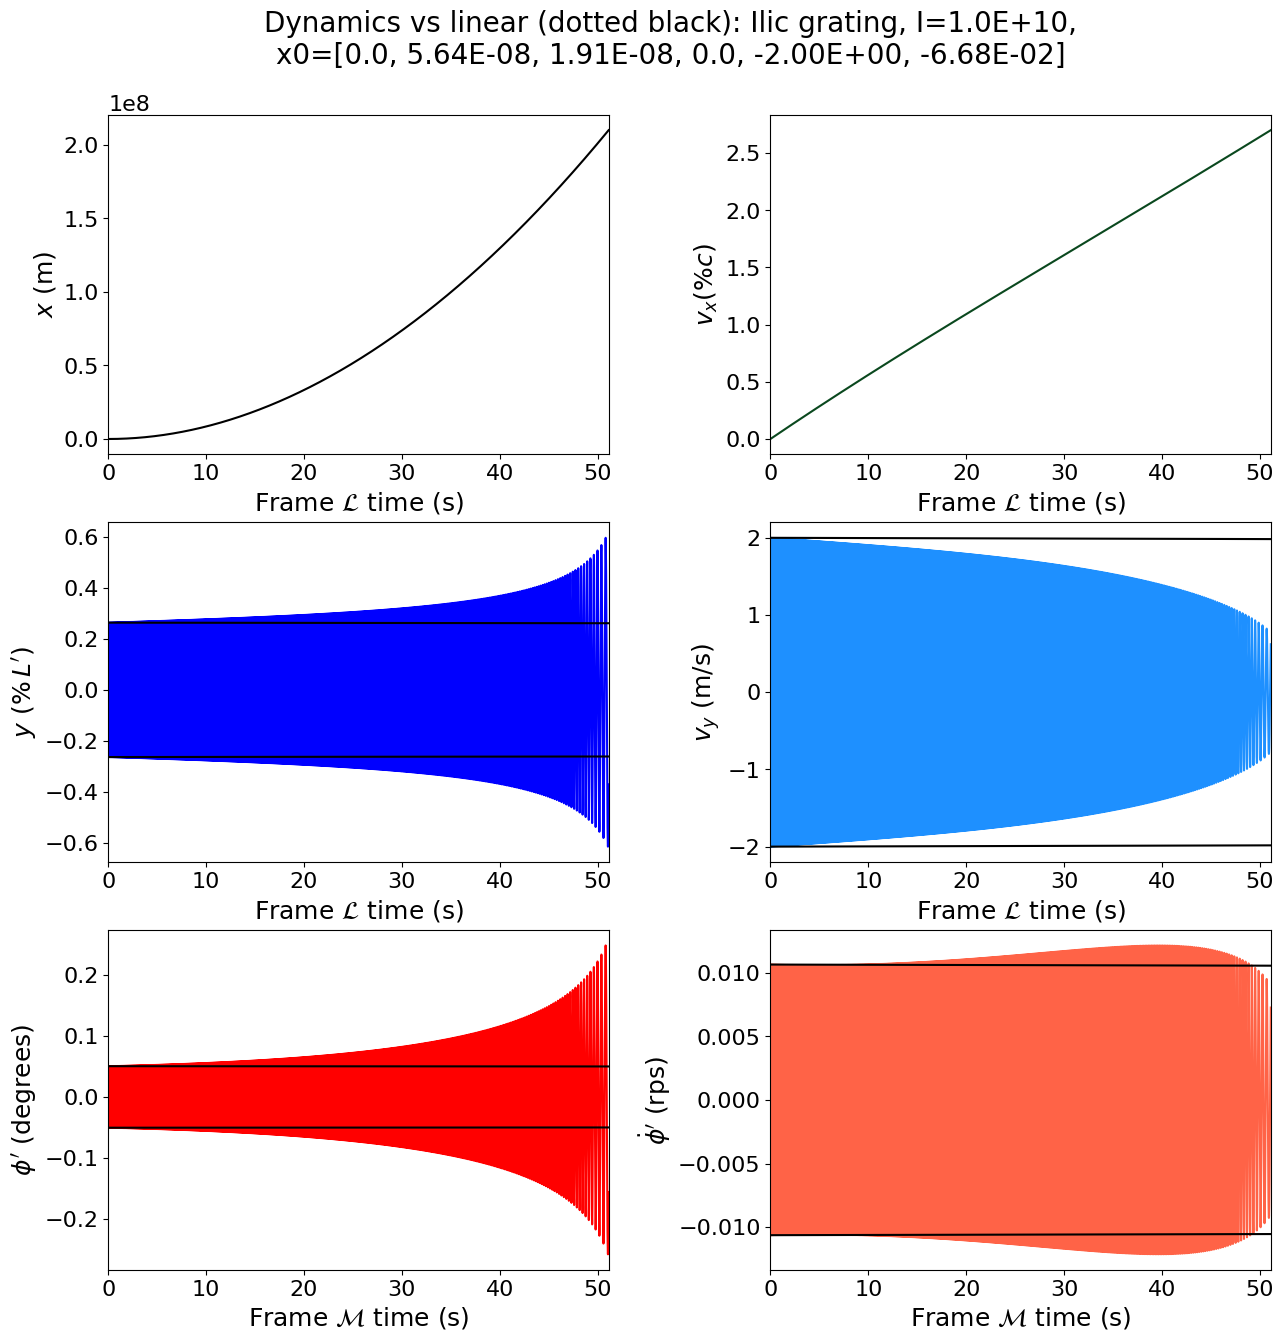

In [94]:
fig, ( (ax1a, dummy, ax1b), (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=3, ncols=3, width_ratios=(1,0.05,1), figsize=(15,15))
dummy.axis('off')
dummy2.axis('off')
dummy3.axis('off')
fig.suptitle(rf"Dynamics vs linear (dotted black): {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]",
             y=0.95)

############
ax1a.plot(timeL_trunc, x_trunc, color=colorX)
ax1b.plot(timeL_trunc, 100*vx_trunc/c, color=colorvX)
ax1a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$x$ (m)")
ax1b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_x (\% c)$")

############
ax2a.plot(timeL_trunc, (y_trunc/L)*100, color=colorY)
ax2b.plot(timeL_trunc, vy_trunc, color=colorvY)
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
ax3a.plot(timeM_trunc, (180/np.pi)*phiM_trunc, color=colorphi)
ax3b.plot(timeM_trunc, (0.5/np.pi)*phidotM_trunc, color=colorvphi)
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

## Envelope
ax2a.plot(t_array, (y_lin_conj/L)*100, color='black')
ax2a.plot(t_array, -(y_lin_conj/L)*100, color='black')
ax2b.plot(t_array, vy_lin_conj, color='black')
ax2b.plot(t_array, -vy_lin_conj, color='black')
ax3a.plot(t_array, (180/np.pi)*phi_lin_conj, color='black')
ax3a.plot(t_array, -(180/np.pi)*phi_lin_conj, color='black')
ax3b.plot(t_array, (0.5/np.pi)*vphi_lin_conj, color='black')
ax3b.plot(t_array, -(0.5/np.pi)*vphi_lin_conj, color='black')

## x-bounds
ax1a.set_xlim(0,timeL_trunc[-1])
ax1b.set_xlim(0,timeL_trunc[-1])
ax2a.set_xlim(0,timeL_trunc[-1])
ax2b.set_xlim(0,timeL_trunc[-1])
ax3a.set_xlim(0,timeL_trunc[-1])
ax3b.set_xlim(0,timeL_trunc[-1])